# <font color='LightBlue'> **Transportation Model**</font>

<font color='Silver'>
Kevin Schaaf ()
Haron Malash ()
Sanjhana Bhusal ()
Martijn Messanella ()
Lisa Pahladsingh ()
</font>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


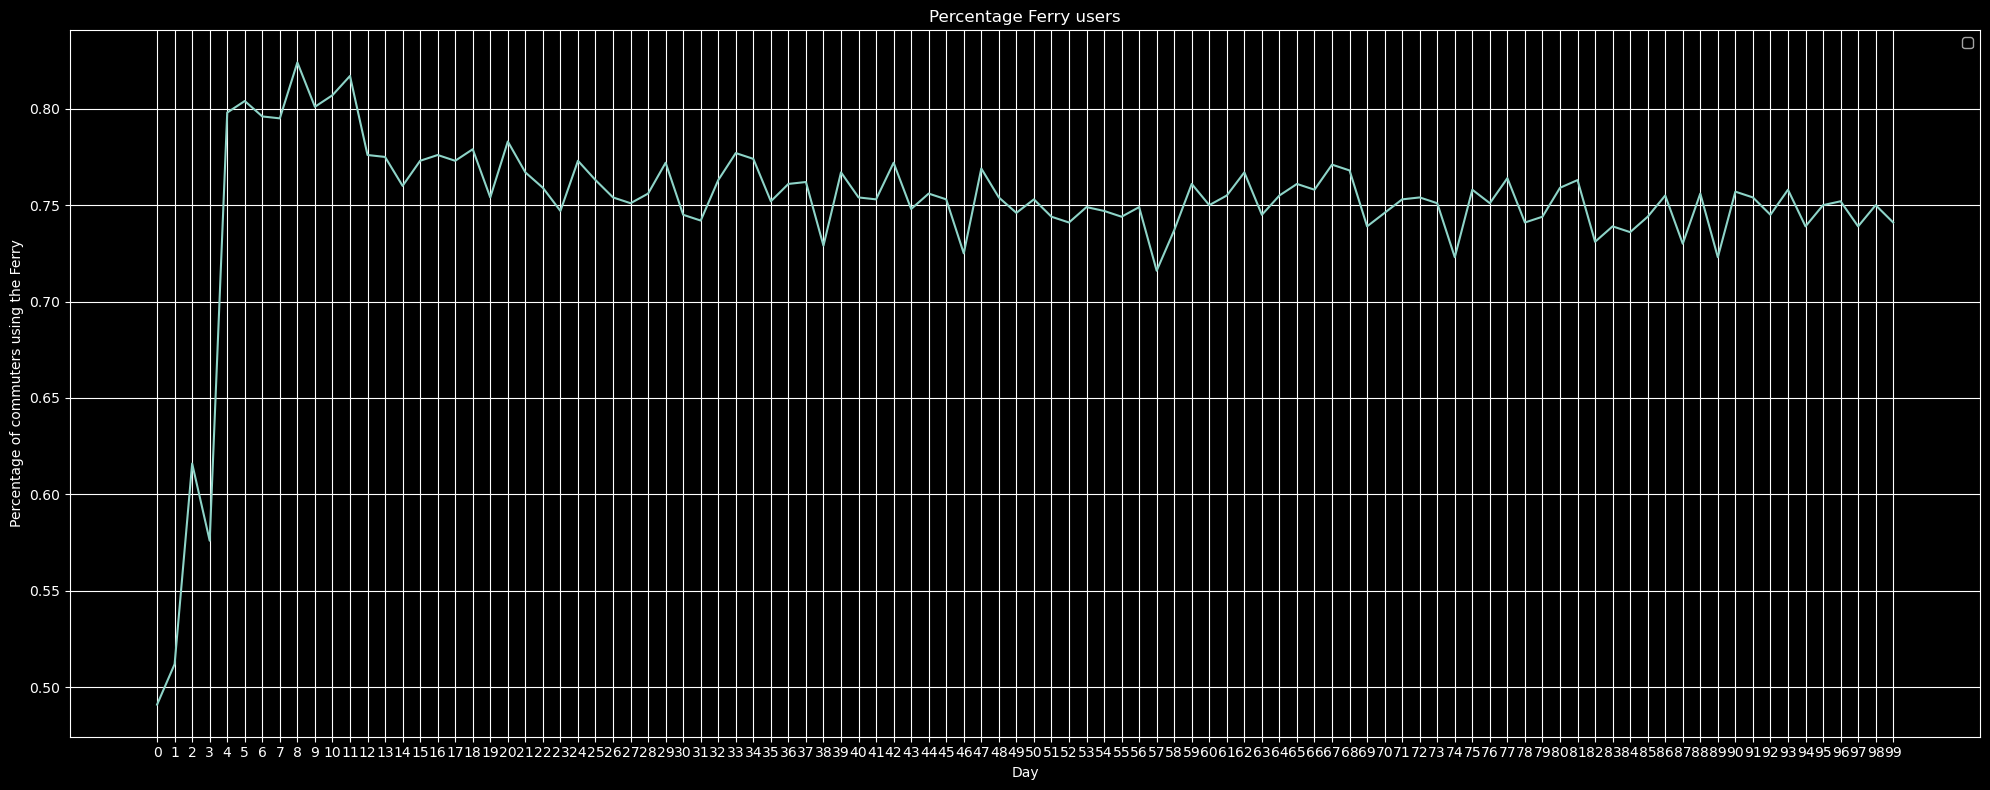

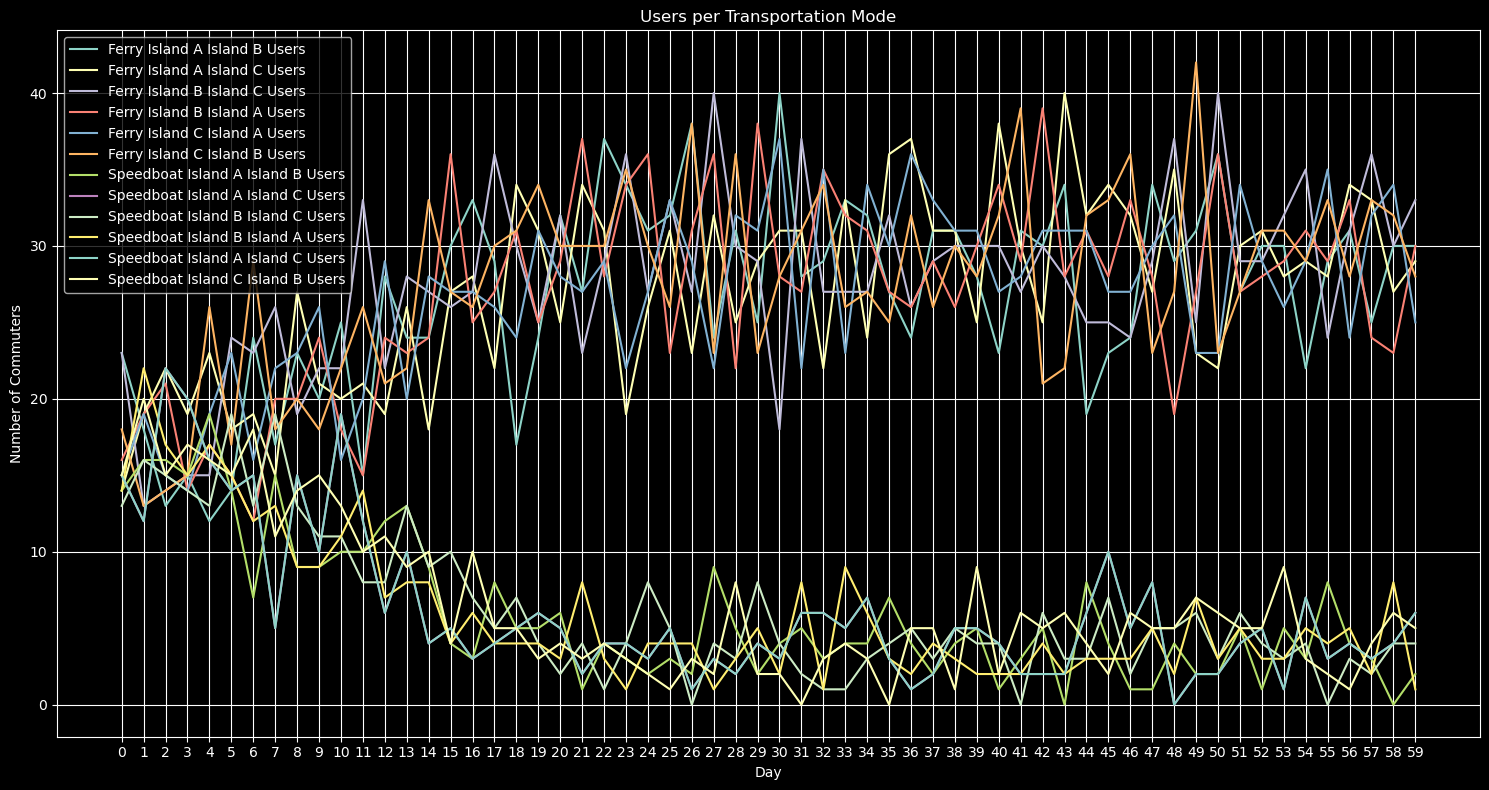

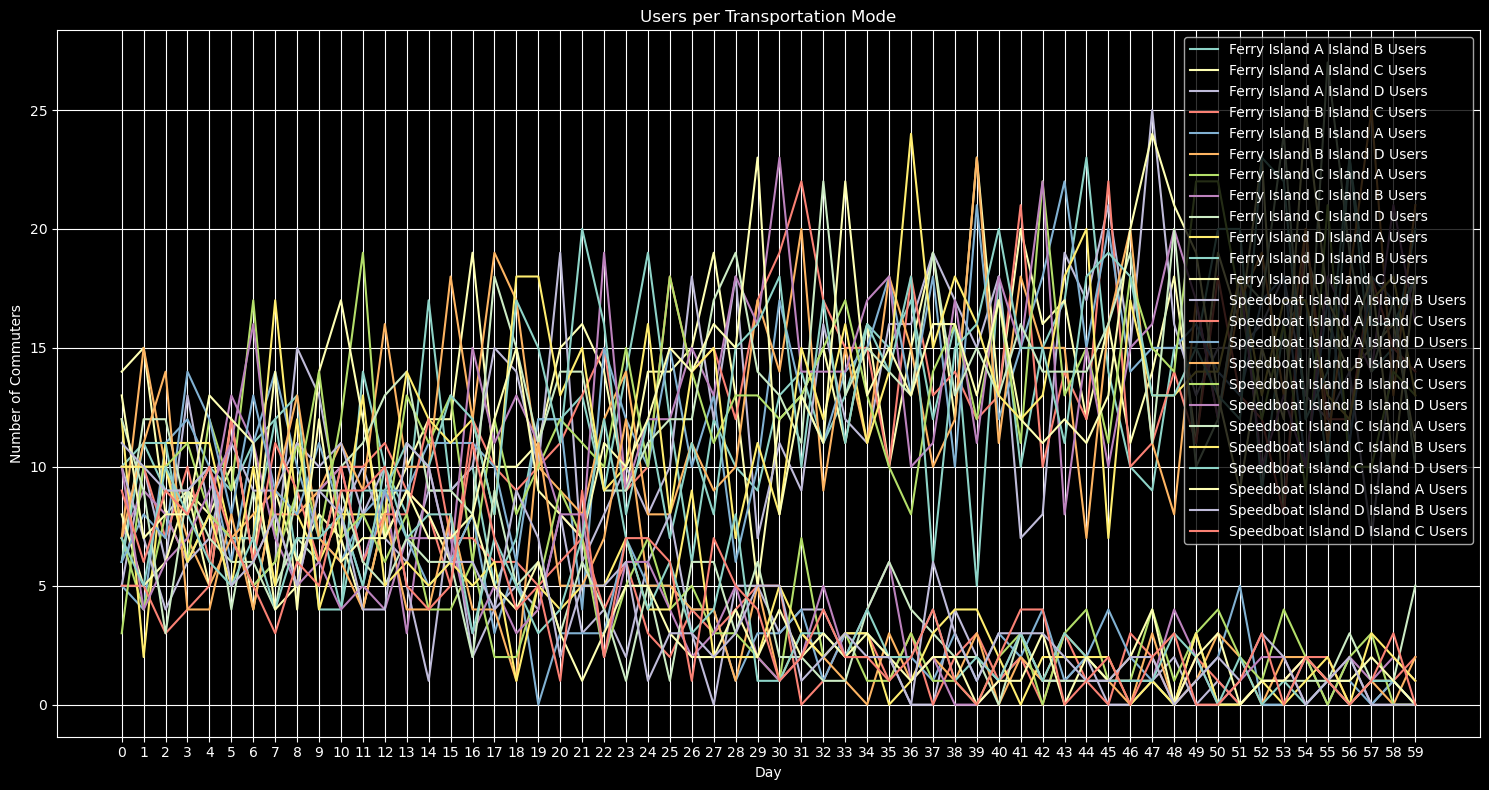

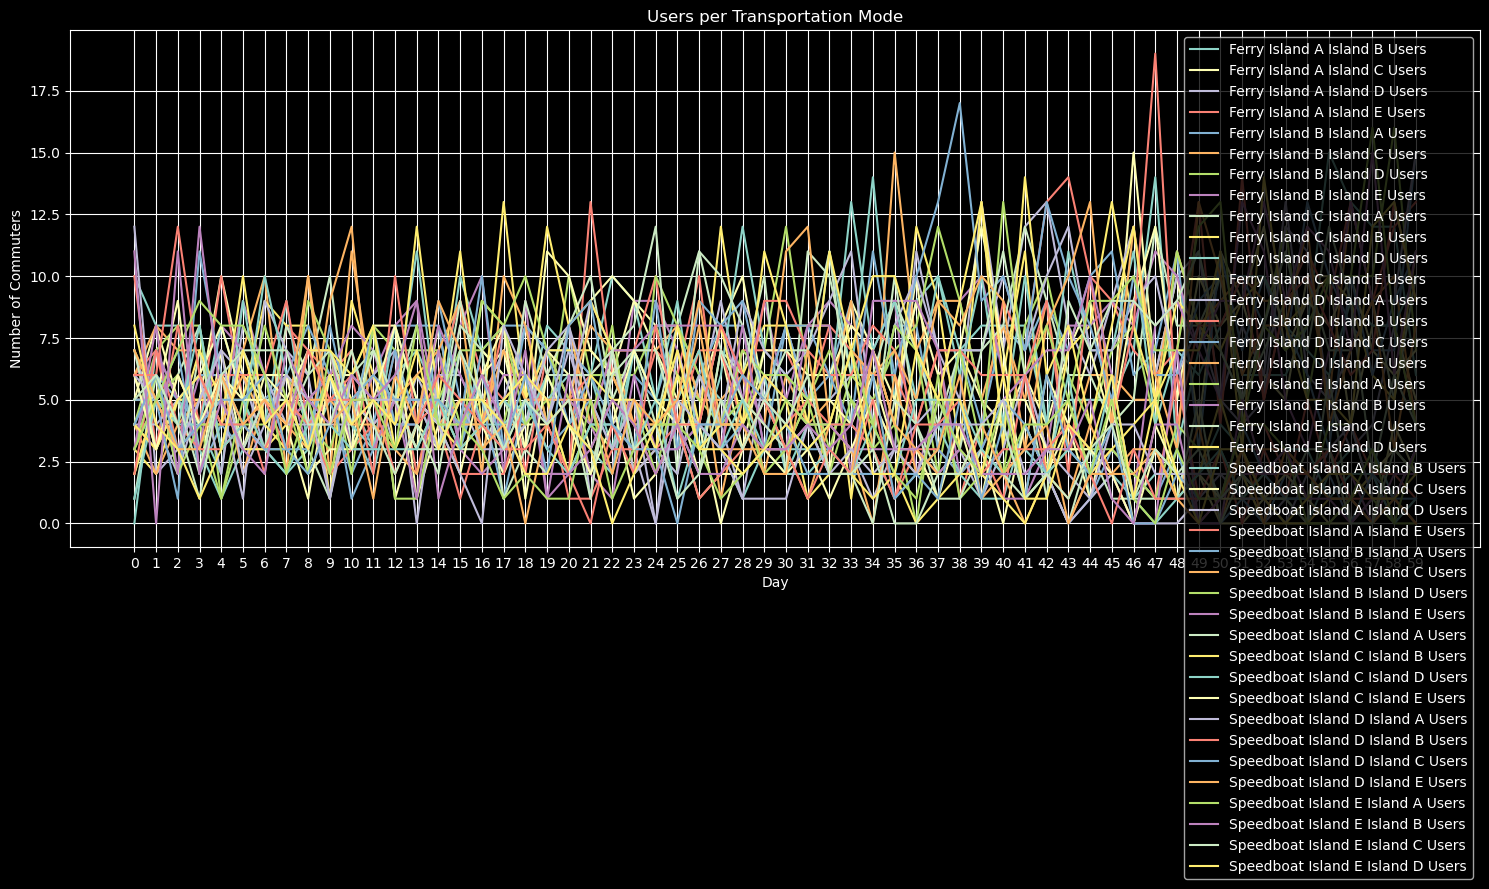

In [2]:
from Simulate import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

plt.style.use('default')

## <font color='LightGreen'> ***Price***</font>
Sanjhana

In [3]:
def ferry_price_policy(num_commuters, islands, fares, metrics_to_plot):

    for fare in fares: 
        
        simulation = Simulation(
            num_commuters=num_commuters,
            num_days=60,
            islands=islands,
            capacity=1000,
            ferry_base_price=fare,
            ferry_base_time=40,
            speedboat_base_price=6,
            speedboat_base_time=10,
        )

        simulation.run()
        simulation.plot_specific_results(metrics_to_plot)

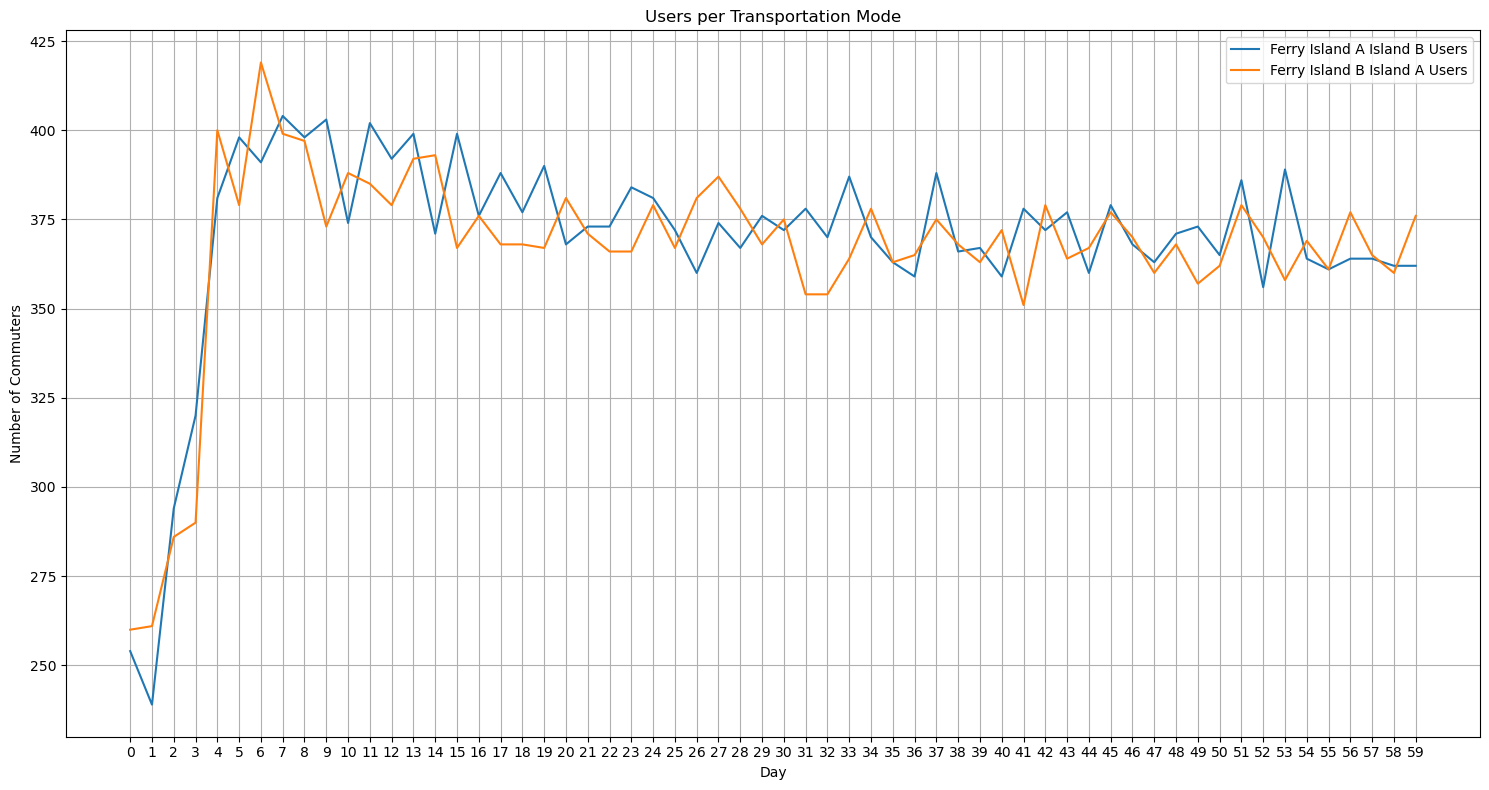

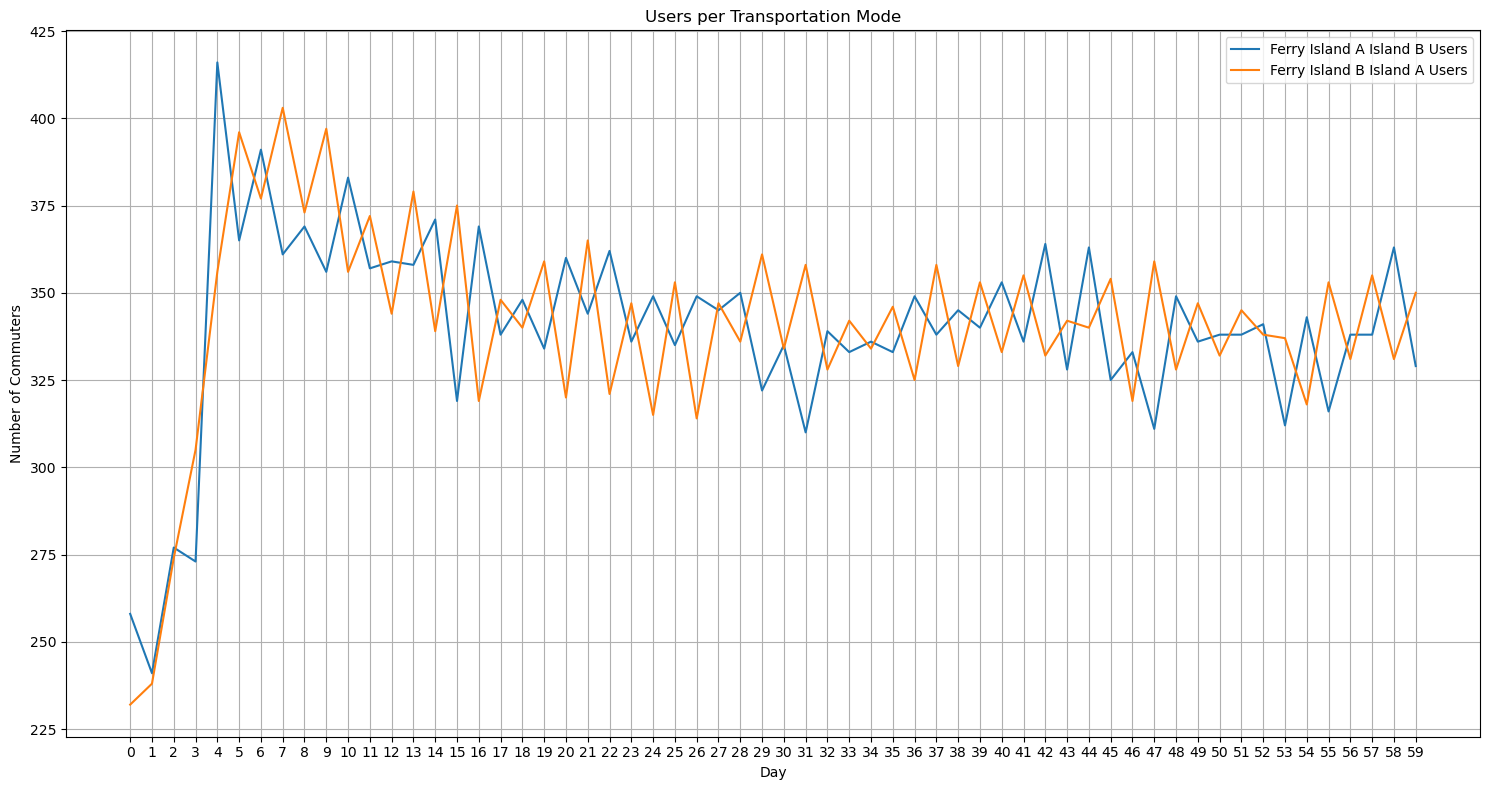

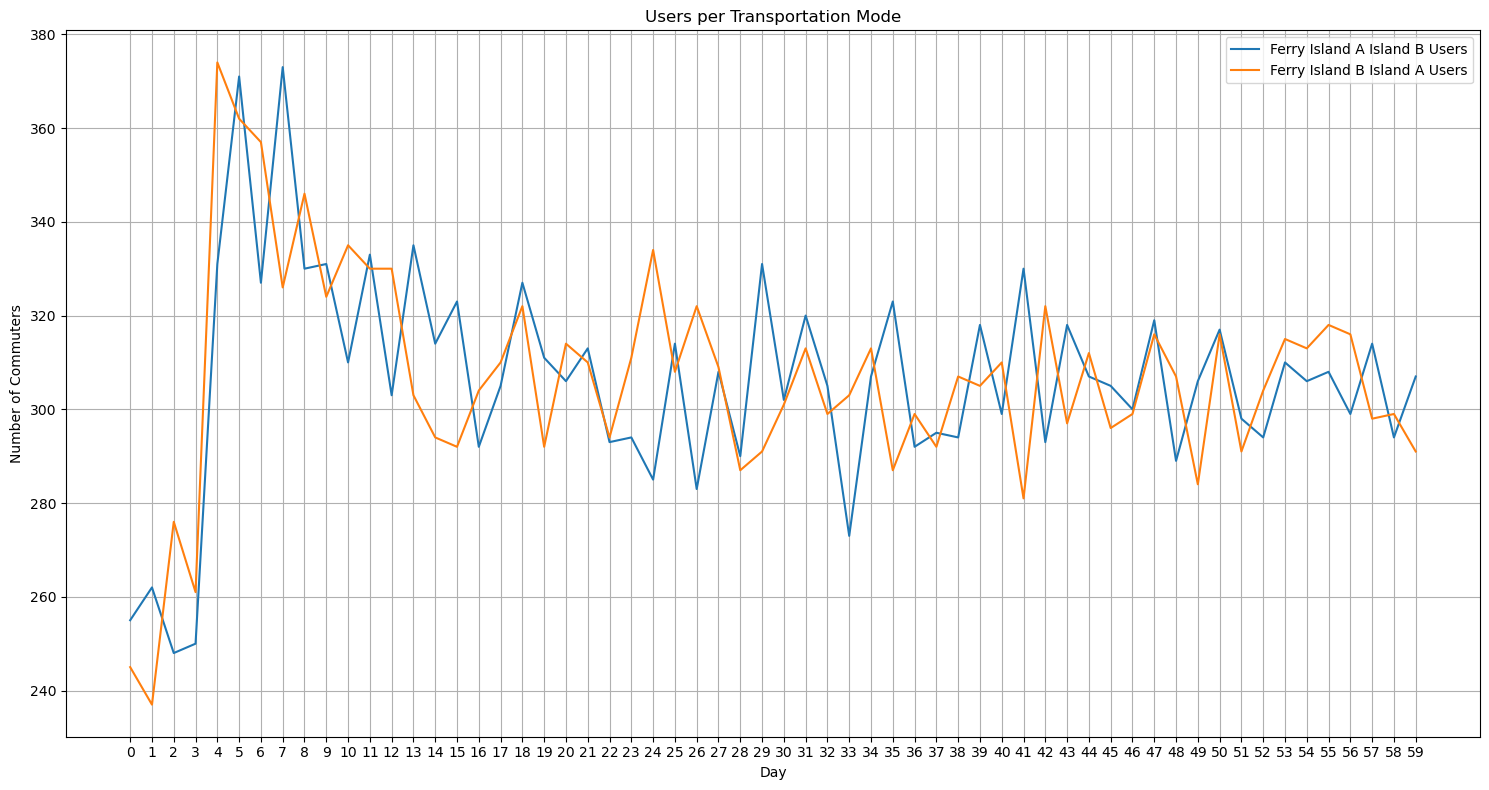

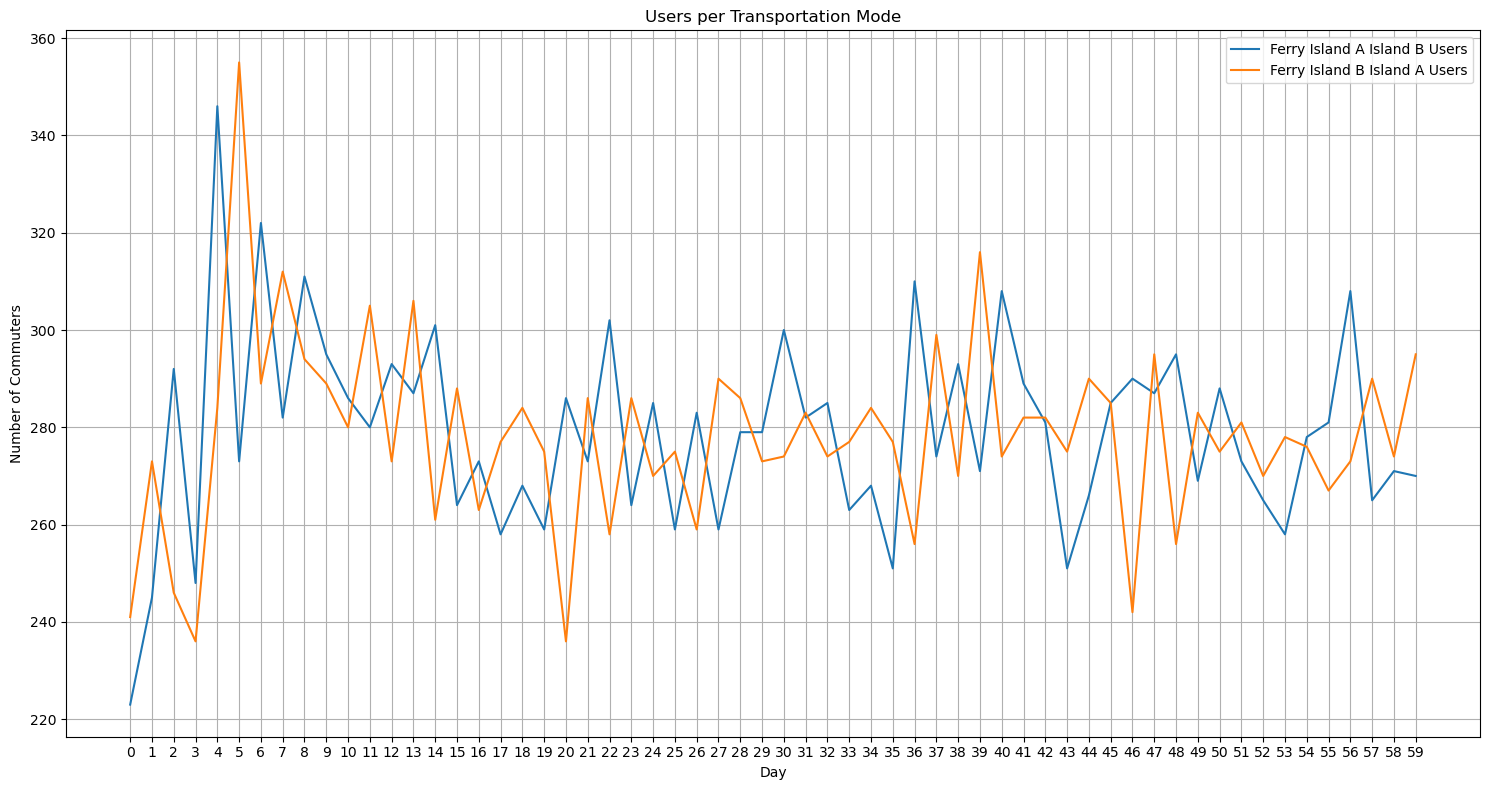

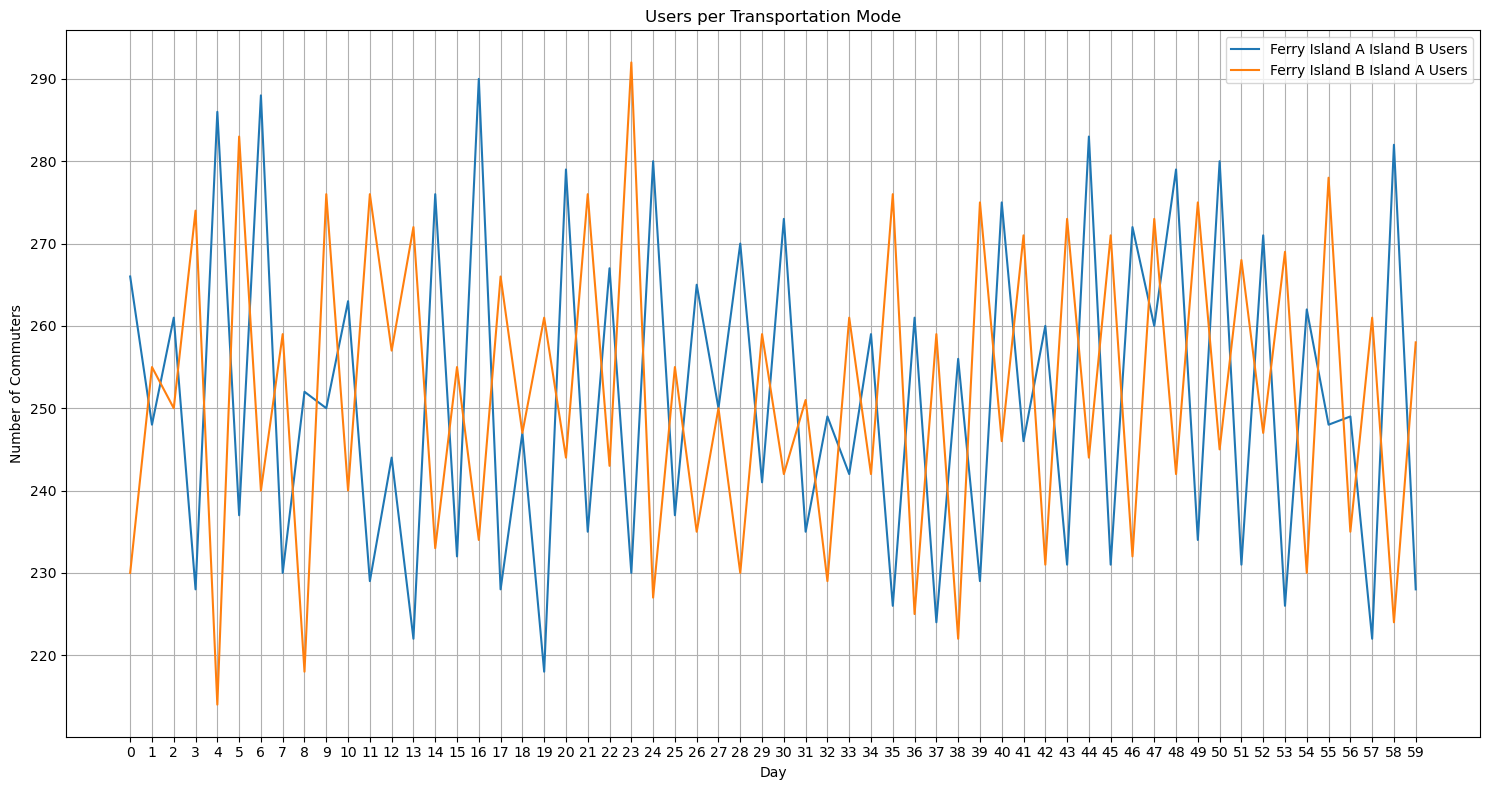

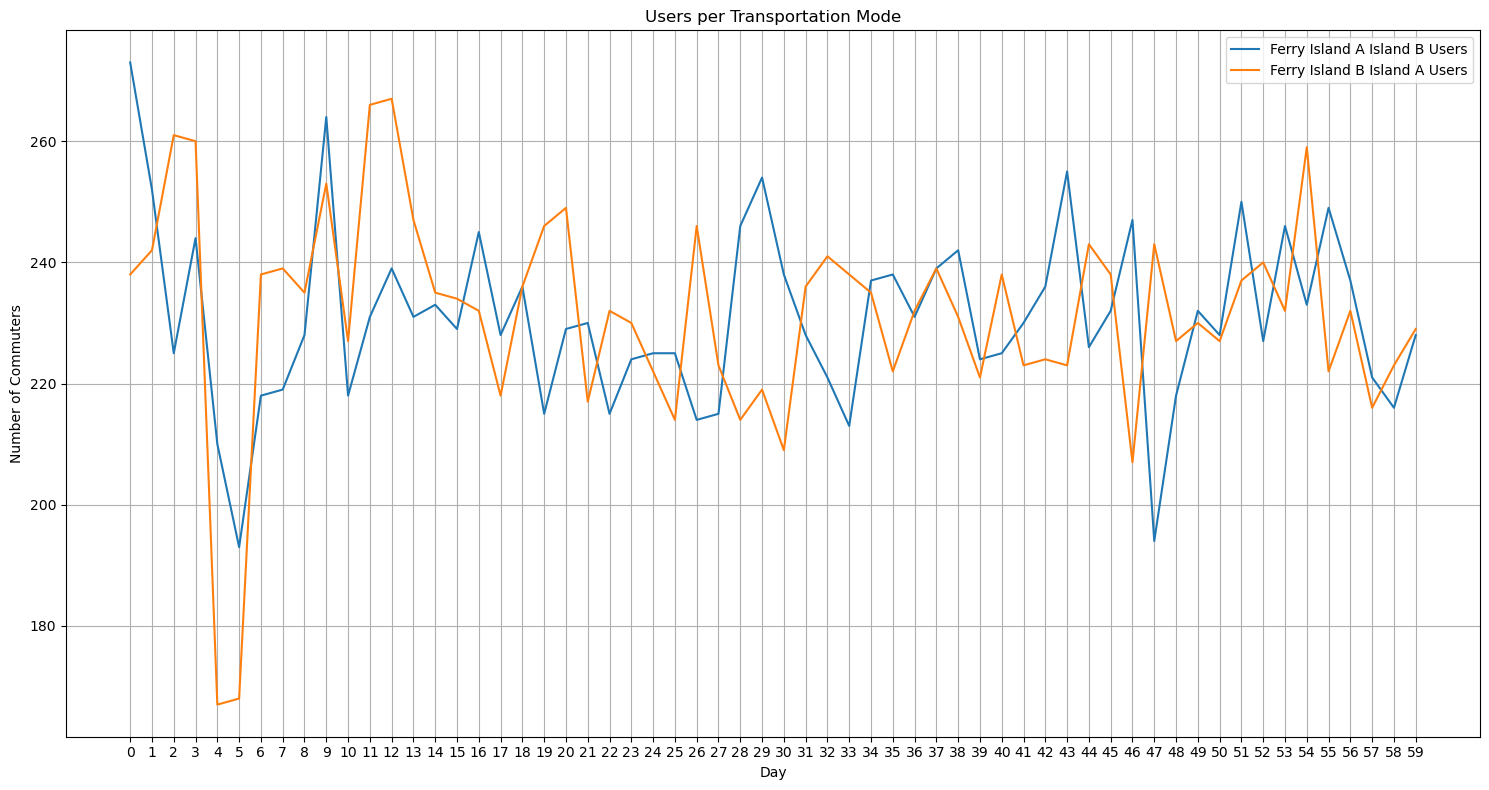

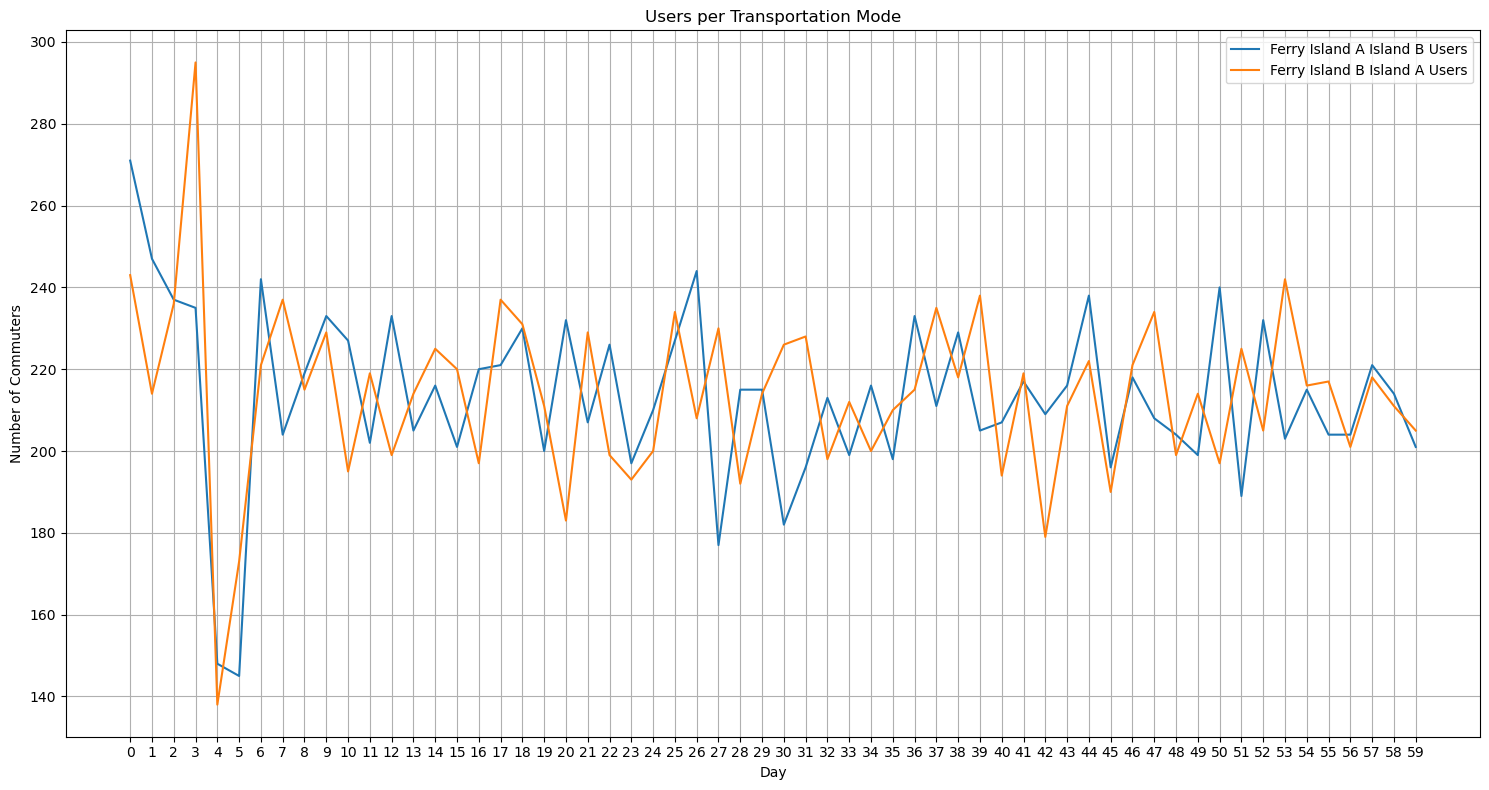

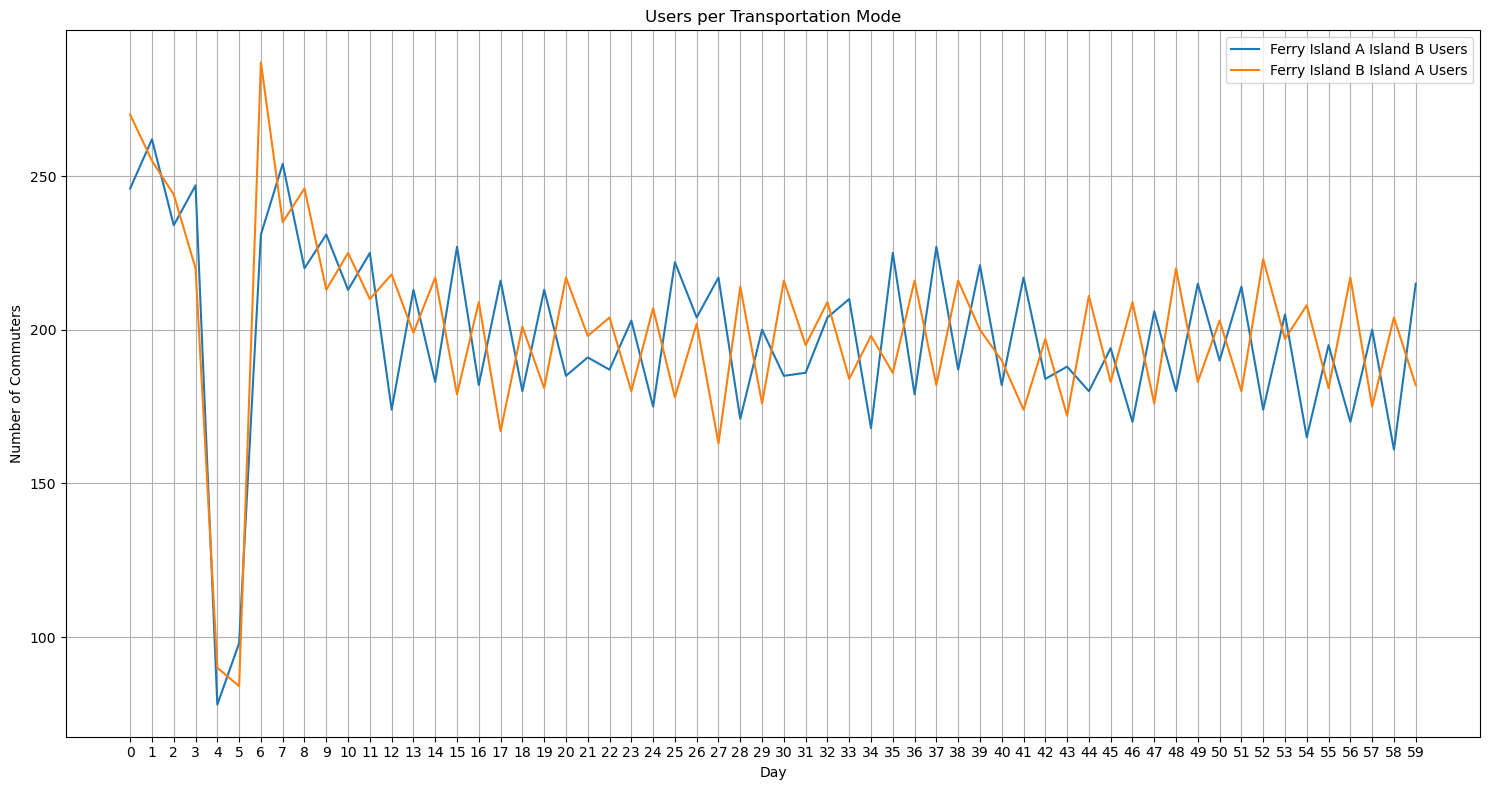

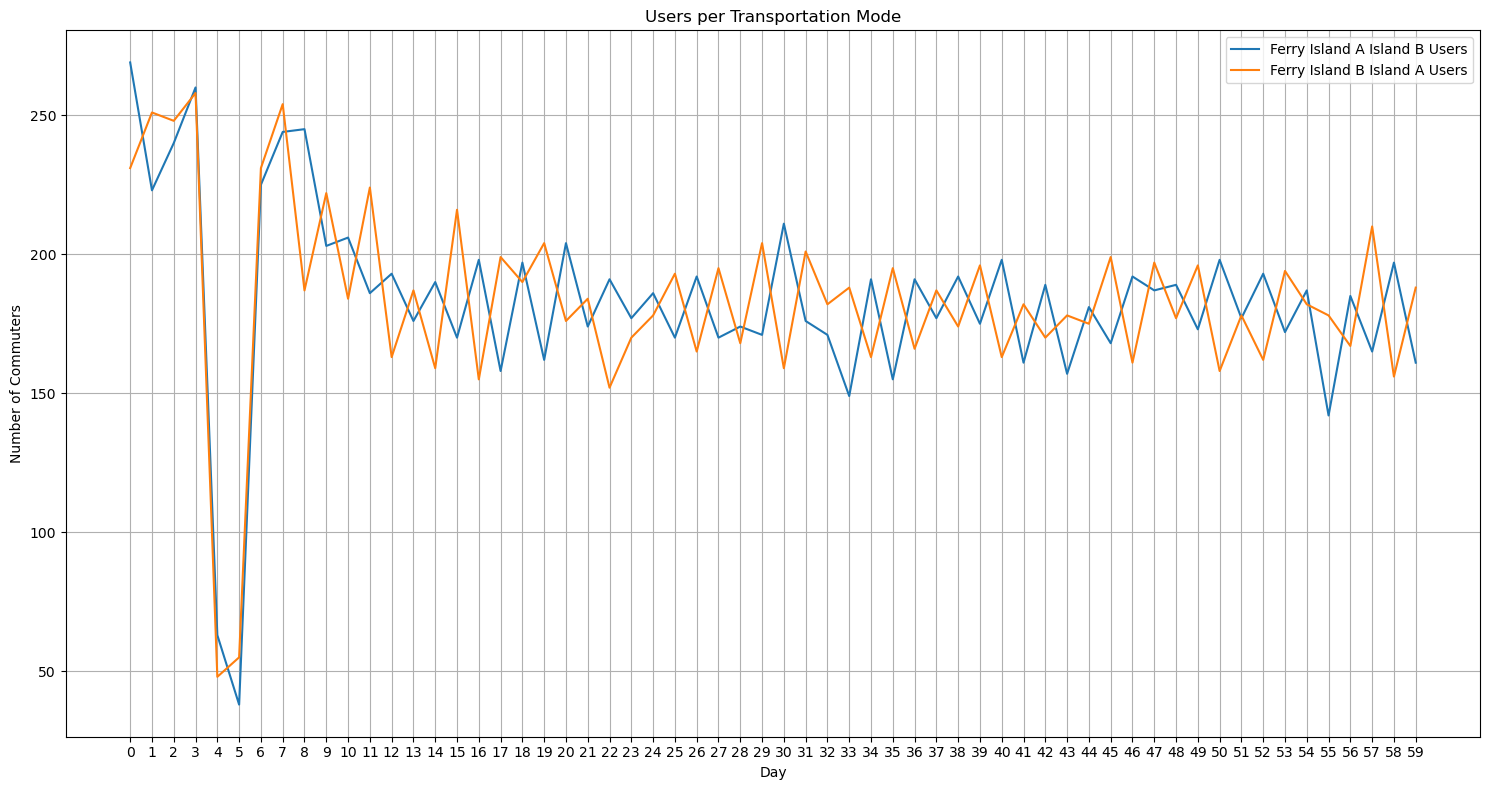

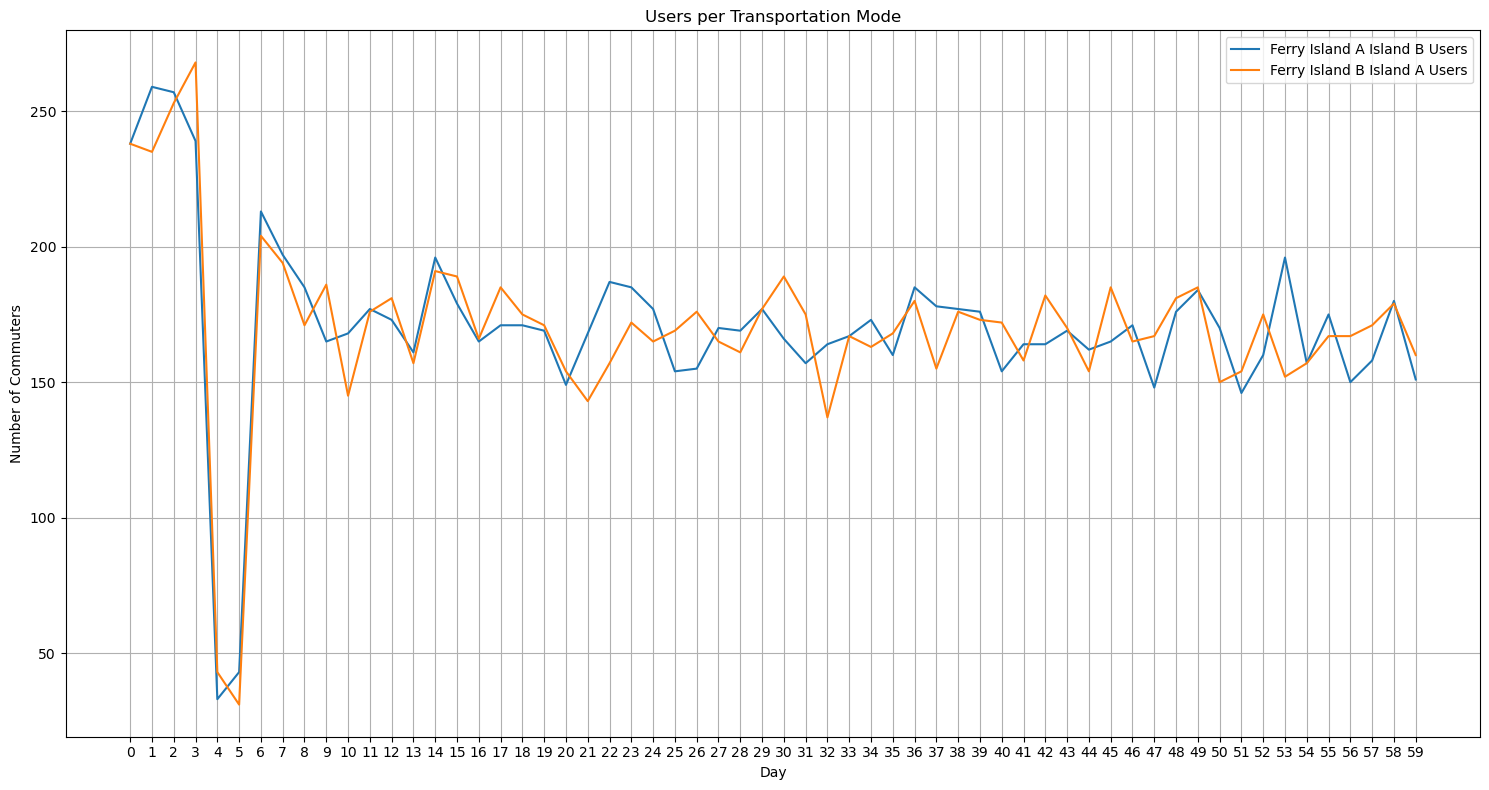

In [4]:
islands = ["Island_A", "Island_B"]
num_commuters = 1000

fares = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Plot specific results
metrics_to_plot = [
    'Ferry_Island_A_Island_B_users',
    'Ferry_Island_B_Island_A_users'
    ]

ferry_price_policy(num_commuters, islands, fares, metrics_to_plot)


Het lijkt er op alsof er minder schommeling is bij een hogere prijzen, maar de percentage ferry gebruikers neemt wel duidelijk af bij een toename in prijs.

## <font color='LightGreen'> ***Capacity***</font>
Kevin

In [5]:
def vary_capacity_experiment(num_commuters, islands, capacity, metrics_to_plot, ferry_base_price):
    '''
    This function executes the capacity experiment. 
    args:
        num_commuters:   The number of agents in the model
        islands:         The names of the islands included in the model
        capacities:      A list or array of integers, with the lowest integer the number of agents
        metrics_to_plot: A list of all the metrics you want to plot; 
                         This should be a list of strings with the names of the metrics.
                         Also, this variable might need adjustment for different number of islands
    Output:
        Plot of the percentage of ferry users for this settings of the experiment. 
    '''
    simulation = Simulation(
        num_commuters=num_commuters,
        num_days=60,
        islands=islands,
        capacity=capacity,
        ferry_base_price=ferry_base_price,
        ferry_base_time=40,
        speedboat_base_price=6,
        speedboat_base_time=10,
    )

    simulation.run()

    # Plot specific results
    metrics_to_plot = [
        'Ferry_Island_A_Island_B_users',
        'Ferry_Island_B_Island_A_users', 
        'Speedboat_Island_A_Island_B_users', 
        'Speedboat_Island_B_Island_A_users'
    ]

    return simulation.return_percentage_ferry_users(metrics_to_plot)

In [6]:
islands = ["Island_A", "Island_B"]
num_commuters = 1000
prices = np.arange(1, 11, 1)
capacities = np.arange(200, 2200, 200)
runs = 2
ferry_base_price = 1

num_days = 60
metrics_to_plot = [
    'Ferry_Island_A_Island_B_users',
    'Ferry_Island_B_Island_A_users', 
    'Speedboat_Island_A_Island_B_users', 
    'Speedboat_Island_B_Island_A_users'
]

percentages_ferry_users = np.zeros((len(capacities), len(prices), num_days, runs))
mean = np.zeros((len(capacities), len(prices), num_days))
CI = np.zeros((len(capacities), len(prices), num_days, 2))

mean_mean = np.zeros((len(capacities), len(prices)))
CI_mean = np.zeros((len(capacities), len(prices), 2))
capacity = 1000

for price_ix, ferry_base_price in enumerate(prices):
    for capacity_ix, capacity in enumerate(capacities):
        for i in range(runs):
            percentages_ferry_users[capacity_ix, price_ix, :, i] = vary_capacity_experiment(num_commuters, islands, capacity, metrics_to_plot, ferry_base_price)

        mean[capacity_ix, price_ix] = np.mean(percentages_ferry_users[capacity_ix, price_ix], axis=1)
        CI[capacity_ix, price_ix] = np.percentile(percentages_ferry_users[capacity_ix, price_ix], [2.5, 97.5], axis=1).T

        mean_mean[capacity_ix, price_ix] = np.mean(mean[capacity_ix, price_ix, -10:])
        CI_mean[capacity_ix, price_ix] = np.percentile(mean[capacity_ix, price_ix, -10:], [2.5, 97.5])


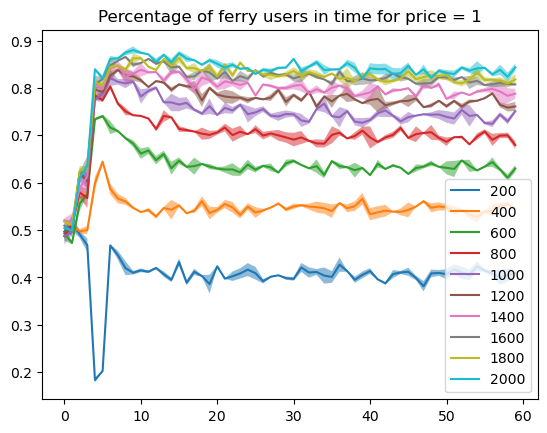

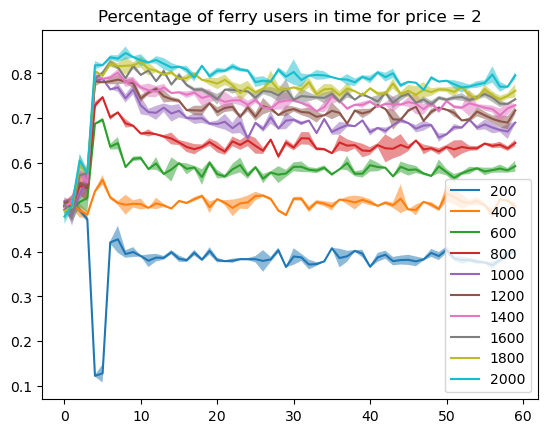

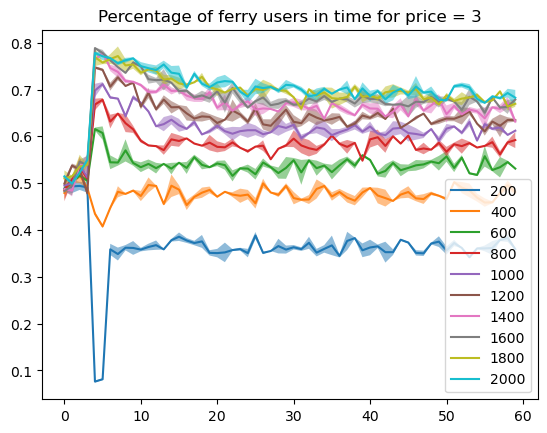

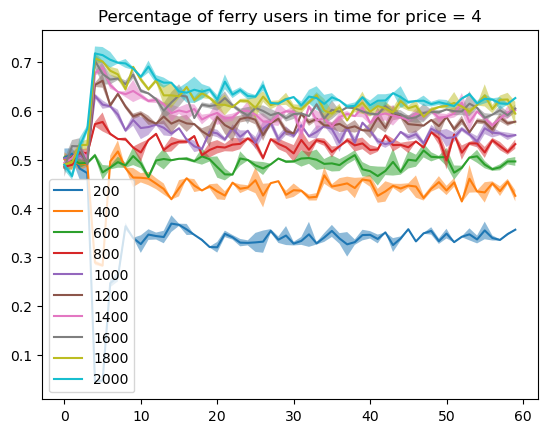

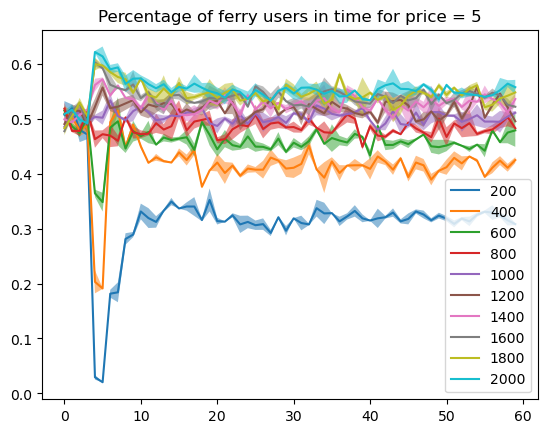

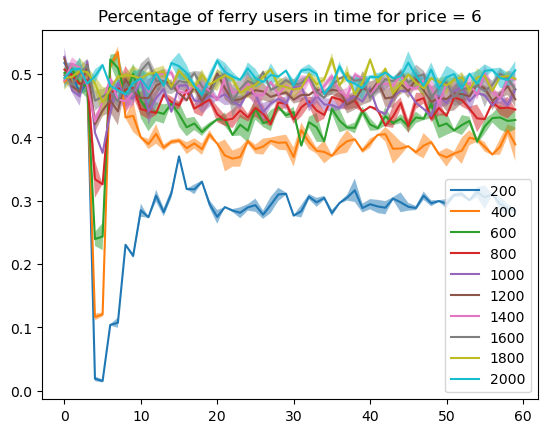

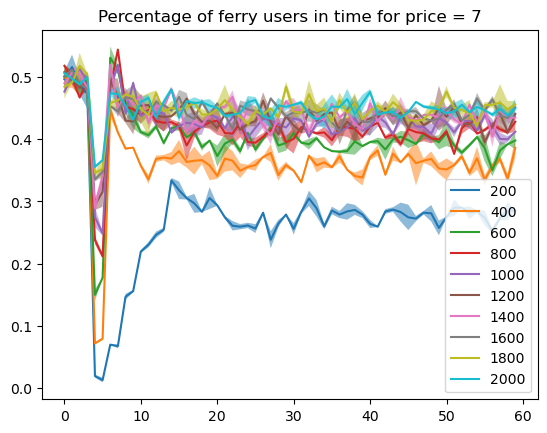

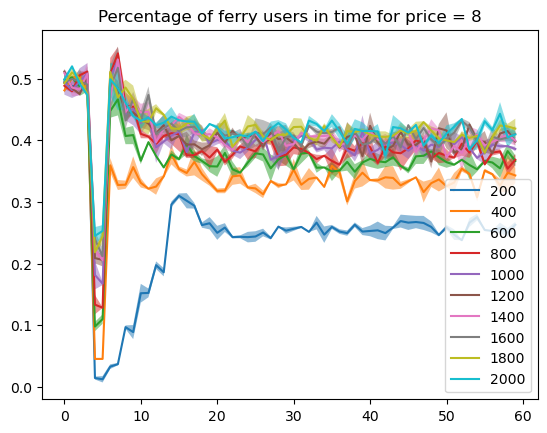

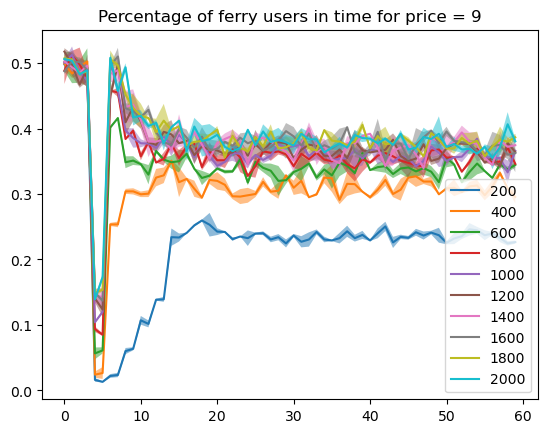

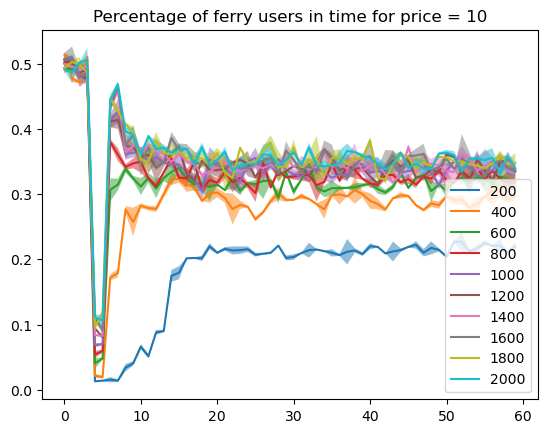

In [7]:
for price_ix, ferry_base_price in enumerate(prices):
    plt.figure()
    for capacity_ix, capacity in enumerate(capacities):
        plt.plot(mean[capacity_ix, price_ix], label=capacity)
        plt.fill_between(np.arange(0, num_days, 1), CI[capacity_ix, price_ix, :, 0], CI[capacity_ix, price_ix, :, 1], alpha=0.5)
        plt.title(f'Percentage of ferry users in time for price = {ferry_base_price}')
    plt.legend()
    plt.show()

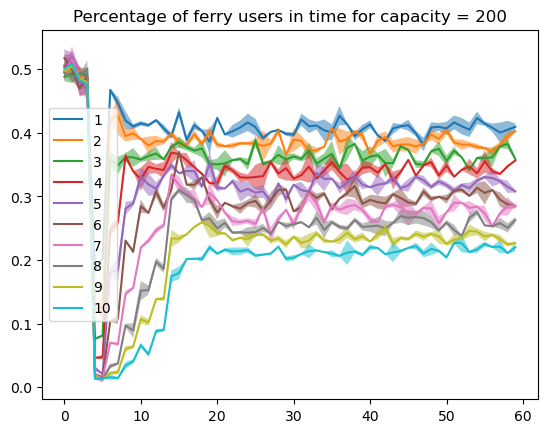

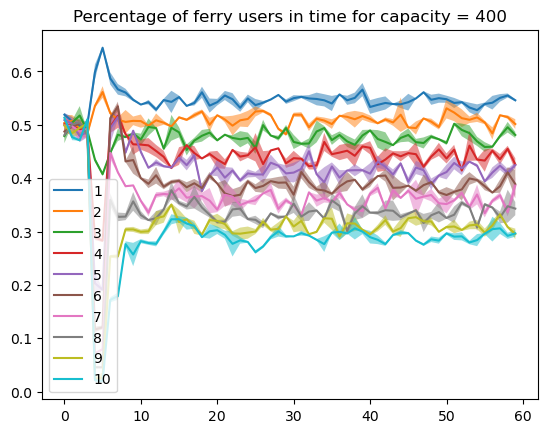

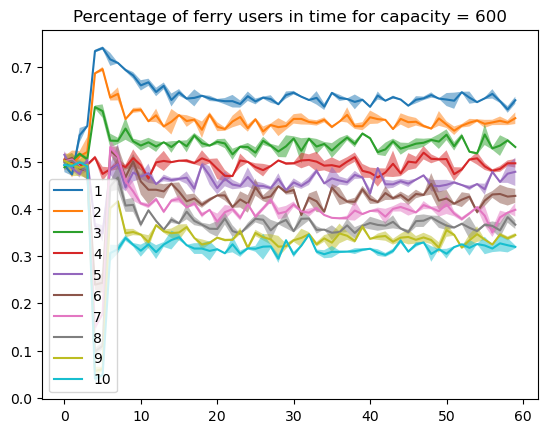

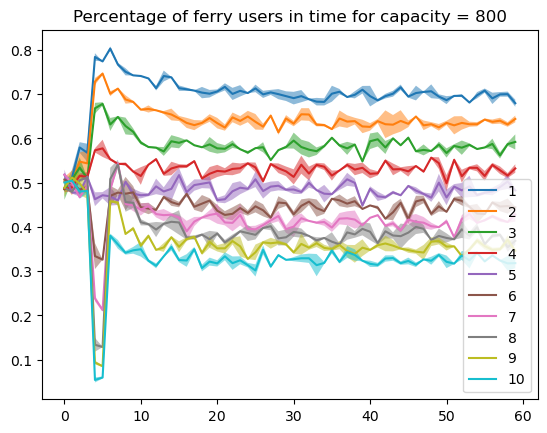

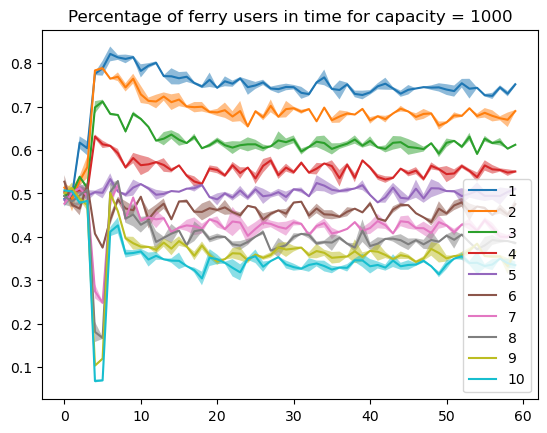

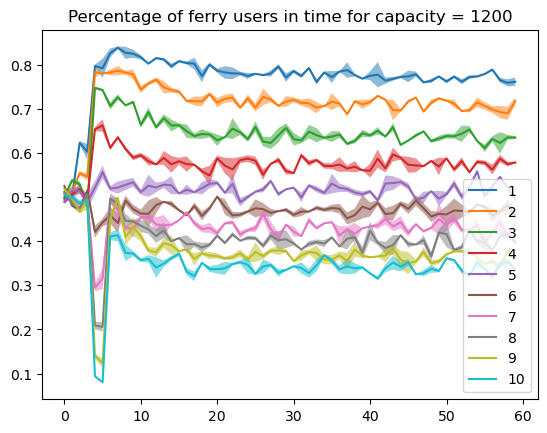

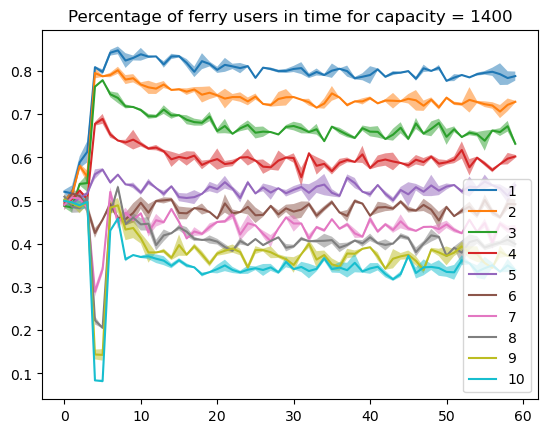

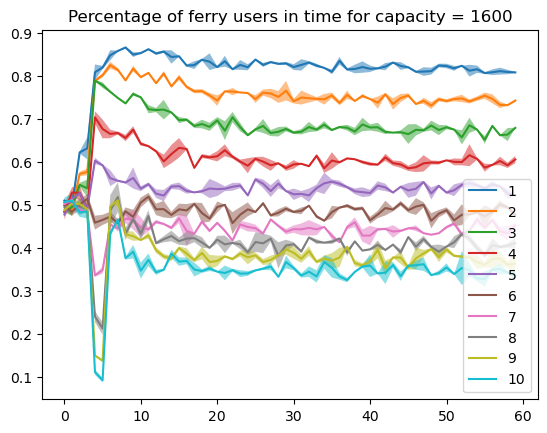

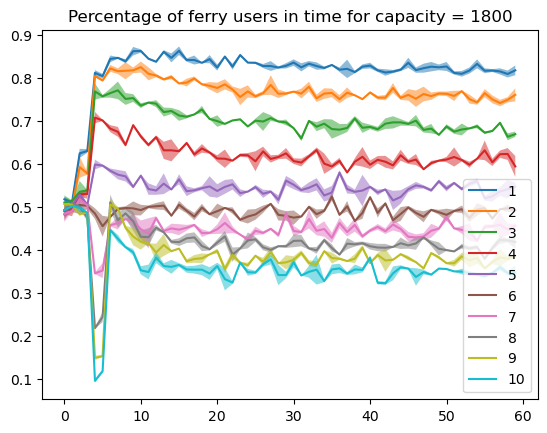

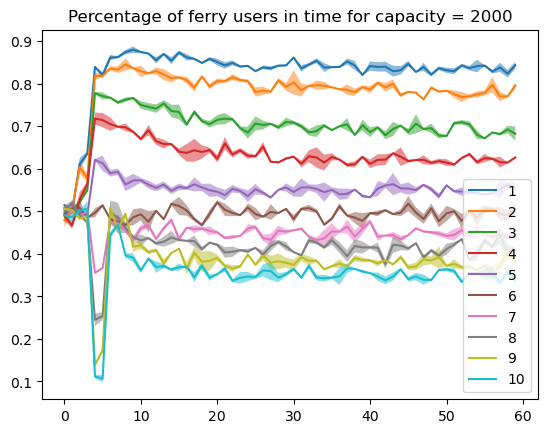

In [8]:
for capacity_ix, capacity in enumerate(capacities):
    plt.figure()
    for price_ix, ferry_base_price in enumerate(prices):
        plt.plot(mean[capacity_ix, price_ix], label=ferry_base_price)
        plt.fill_between(np.arange(0, num_days, 1), CI[capacity_ix, price_ix, :, 0], CI[capacity_ix, price_ix, :, 1], alpha=0.5)
        plt.title(f'Percentage of ferry users in time for capacity = {capacity}')
    plt.legend()
    plt.show()

In [16]:
print(mean_mean[:, 4])

[0.3189  0.4176  0.45845 0.48355 0.50065 0.5204  0.5307  0.53765 0.54265
 0.5495 ]


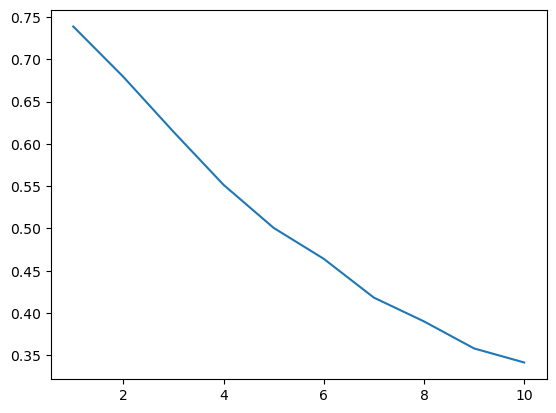

In [17]:
plt.figure()
capacity_ix = 4
plt.plot(prices, mean_mean[capacity_ix, :])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


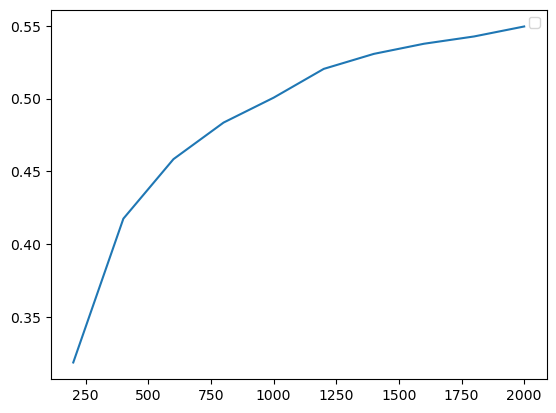

In [18]:
plt.figure()
price_ix = 4
plt.plot(capacities, mean_mean[:, price_ix])
plt.legend()
plt.show()

In [21]:
%matplotlib

Using matplotlib backend: QtAgg


In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for capacities and prices
X, Y = np.meshgrid(capacities, prices)
Z = mean_mean.T  # Transpose to match the meshgrid dimensions

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Capacity')
ax.set_ylabel('Price')
ax.set_zlabel('Mean Percentage of Ferry Users')
ax.set_title('3D Surface Plot of Mean Percentage of Ferry Users')

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

In [ ]:
def save_run(filename):
        data = Simulation.get_model_vars_dataframe()
        # Ensure the directory exists
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        # Save the data to a CSV file
        data.to_csv(filename)

## <font color='LightGreen'> ***Number of Islands***</font>
Martijn